In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ex43a():
    t = 1
    N = 10**5
    M = 10
    c = 1
    sigma = 0.5
    x = np.concatenate((np.zeros((1, M)), np.sqrt(t/N)*np.cumsum(np.random.randn(N, M), axis=0)), axis=0)
    drift = c * np.tile(np.arange(0, t + t/N, t/N), (M, 1)).T
    x = sigma * x + drift
    x = np.exp(x)
    plt.plot(np.arange(0, t + t/N, t/N), np.hstack((x, np.exp(drift[:, 0].reshape(-1, 1)))), linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()


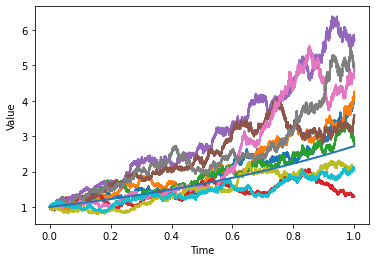

In [2]:
ex43a()

$M$ samples of a geometric Brownian motion at $t=T$ are generated. The expectation $\mathbb{E}[(K-S_1)^+]$ is approximated and confidence bounds using CLT are computed.

In [5]:
import numpy as np

M = 10**6
T = 1
SO = 10
sigma = 0.5  # volatility
K = 11  # strike price
X = np.sqrt(T) * np.random.randn(1, M)

S = SO * np.exp(sigma * X - 0.5 * T * (sigma ** 2))  # simulated stock prices
HS = np.maximum(K - S, 0)  # calculation of payoff
price = np.mean(HS)

# 95% confidence intervals
AM = price - 1.96 * np.sqrt(np.var(HS) / M)  # based on CLT
BM = price + 1.96 * np.sqrt(np.var(HS) / M)

print('Estimated value: ', price)
print('Confidence interval: ', [AM, BM])


Estimated value:  2.6082855191927576
Confidence interval:  [2.6033003534931507, 2.6132706848923646]
